In [1]:
%pylab inline
%matplotlib inline
import netCDF4 as nc
import xarray as xr 
import pylab as plt
import scipy.io
import math
import numpy.matlib
import xlrd
import pandas as pd
from scipy import stats 
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
### Load excel datasets (CSV format works as well)
dat_udw = pd.read_excel('/Users/sfiso desire/Desktop/Python Classes/Session 3 Python/SANAE53_data.xlsx')
dat_ctd = pd.read_excel('/Users/sfiso desire/Desktop/Python Classes/Session 3 Python/SANAE53_data_ctd.xlsx')

In [3]:
### display data comlumns; get information of the available variables 
dat_udw.columns

Index(['Sample Date', 'bottle', 'Lat.', 'Long.', 'niskin', 'depth', 'DIC_corr',
       'AT_corr', 'IntkeTemp', 'Salinity', 'Comment', 'Unnamed: 11'],
      dtype='object')

In [4]:
dat_udw

,Sample Date,bottle,Lat.,Long.,niskin,depth,DIC_corr,AT_corr,IntkeTemp,Salinity,Comment,Unnamed: 11
0,20140202,SAN1402015321,-67.55,-4.71,0,5,2165.191635,2298.919228,0.2861,33.9426,NaN,CTN underway
1,20140202,SAN1402015322,-66.72,-4.11,0,5,2153.900628,2302.085982,0.3004,33.9523,NaN,CTN underway
2,20140202,SAN1402025323,-65.86,-3.90,0,5,2131.479915,2296.898672,0.7292,33.8229,NaN,CTN underway
3,20140202,SAN1402025324,-65.00,-3.43,0,5,2143.738722,2302.798618,0.6739,33.8591,NaN,CTN underway
4,20140202,SAN1402025325,-64.18,-2.85,0,5,2136.079800,2297.020246,0.7367,33.8221,NaN,CTN underway
...,...,...,...,...,...,...,...,...,...,...,...,...
91,20140120,SAN1401205345C,-67.80,17.50,0,5,2139.812064,2277.563565,-0.0103,33.7147,NaN,IceShelf
92,20140120,SAN1401205343,-67.35,10.01,0,5,2156.741542,2296.946170,-0.0118,33.7873,NaN,IceShelf
93,20140120,SAN1401205342,-67.72,6.85,0,5,2116.643835,2267.963365,-0.6057,33.7965,NaN,IceShelf
94,20140120,SAN1401205341,-68.42,0.82,0,5,2128.841843,2273.830639,-0.4984,33.6419,NaN,IceShelf


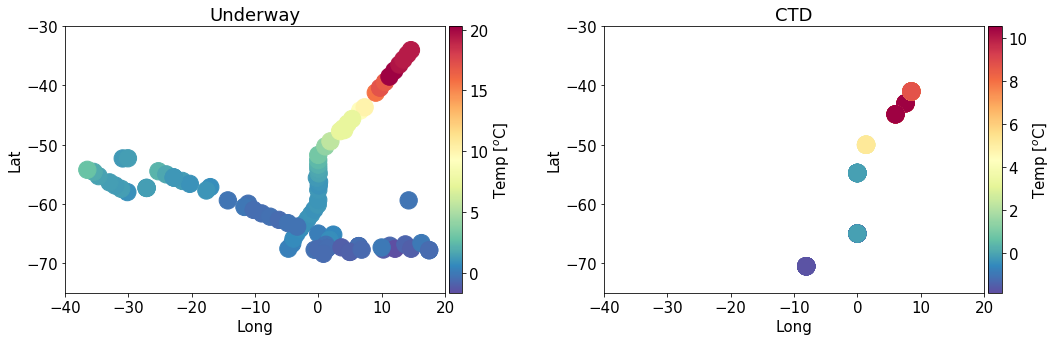

In [5]:
### Location of the dataset (Lat and long), and displaying one variable in colorbar (Temperature)
plt.rcParams['font.size'] = 15
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3
ms = 300
plt.subplot(121)
plt.scatter(dat_udw['Long.'],dat_udw['Lat.'],c = dat_udw['IntkeTemp'],s = ms,cmap = 'Spectral_r')
plt.title('Underway')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Temp [$^o$C]',fontsize = 15)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.xlim(-40,20)
plt.ylim(-75,-30)

plt.subplot(122)
plt.scatter(dat_ctd['Long.'],dat_ctd['Lat.'],c = dat_ctd['IntakeTemp'],s = ms,cmap = 'Spectral_r')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Temp [$^o$C]',fontsize = 15)
plt.title('CTD')
plt.xlabel('Long')
plt.ylabel('Lat')
plt.xlim(-40,20)
plt.ylim(-75,-30)


plt.tight_layout()

In [ ]:
## Install the Gibbs SeaWater (GSW) Oceanographic Toolbox of TEOS-10: pip install gsw (in the terminal), Docs https://teos-10.github.io/GSW-Python/install.html

In [6]:
import gsw
gsw.density.rho?
### To install this module run: pip install gsw (in the terminal), Docs https://teos-10.github.io/GSW-Python/install.html

In [7]:
dat_ctd['depth'].values

array([1000,  640,  430,  340,  200,  150,  100,   70,   60,   35,    5,
       1000,  500,  375,  240,  170,  125,  100,   80,   60,   40,    5,
       1000,  500,  150,  100,   85,   60,   40,   20,    5, 1002,  750,
        550,  450,  350,  300,  260,  220,  200,  180,  160,  140,  120,
        100,   90,   80,   70,   60,   50,   40,   30,   15,   10,  750,
        550,  450,  350,  350,  350,  300,  260,  220,  200,  180,  180,
        180,  160,  140,  120,   70,   60,   50,   80,   90,   40,   30,
         15, 1300, 1000,  750,  500,  400,  400,  300,  200,  150,  125,
        100,   80,   70,   60,   60,   60,   70,   70,   70,   50,   40,
         35,   25,   15,    5,  226,   70,   30,    3,  220,   73,   18,
          4,  222,   30,   16,    3,  223,   80,   25,    3], dtype=int64)

In [8]:
### Computes ocean density
density_ctd  = gsw.density.rho(dat_ctd['Salinity'].values,dat_ctd['IntakeTemp'].values,dat_ctd['depth'].values) - 1000
density_udw  = gsw.density.rho(dat_udw['Salinity'].values,dat_udw['IntkeTemp'].values,0)  - 1000

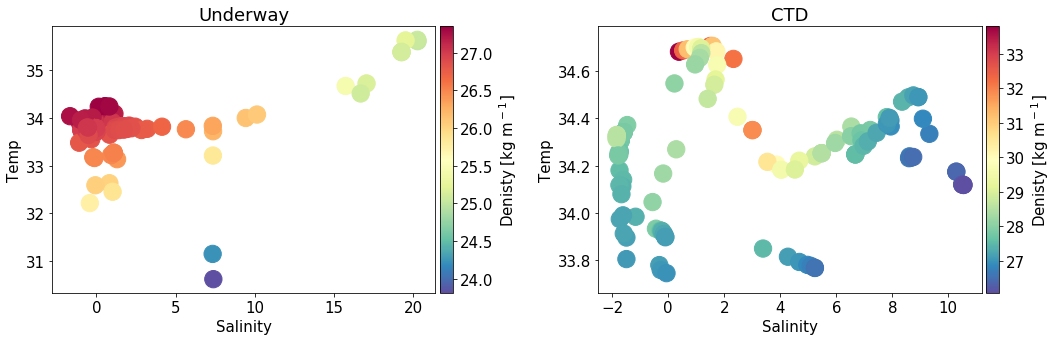

In [9]:
### Water mass properties
plt.rcParams['font.size'] = 15
plt.figure(figsize=[15,5])
plt.rcParams['lines.linewidth'] = 3
ms = 300
plt.subplot(121)
plt.scatter(dat_udw['IntkeTemp'],dat_udw['Salinity'],c = density_udw,s = ms,cmap = 'Spectral_r')
plt.title('Underway')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Denisty [kg m$^-$$^1$]',fontsize = 15)
plt.ylabel('Temp')
plt.xlabel('Salinity')


plt.subplot(122)
plt.scatter(dat_ctd['IntakeTemp'],dat_ctd['Salinity'],c = density_ctd,s = ms,cmap = 'Spectral_r')
plt.title('CTD')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Denisty [kg m$^-$$^1$]',fontsize = 15)
plt.ylabel('Temp')
plt.xlabel('Salinity')

plt.tight_layout()

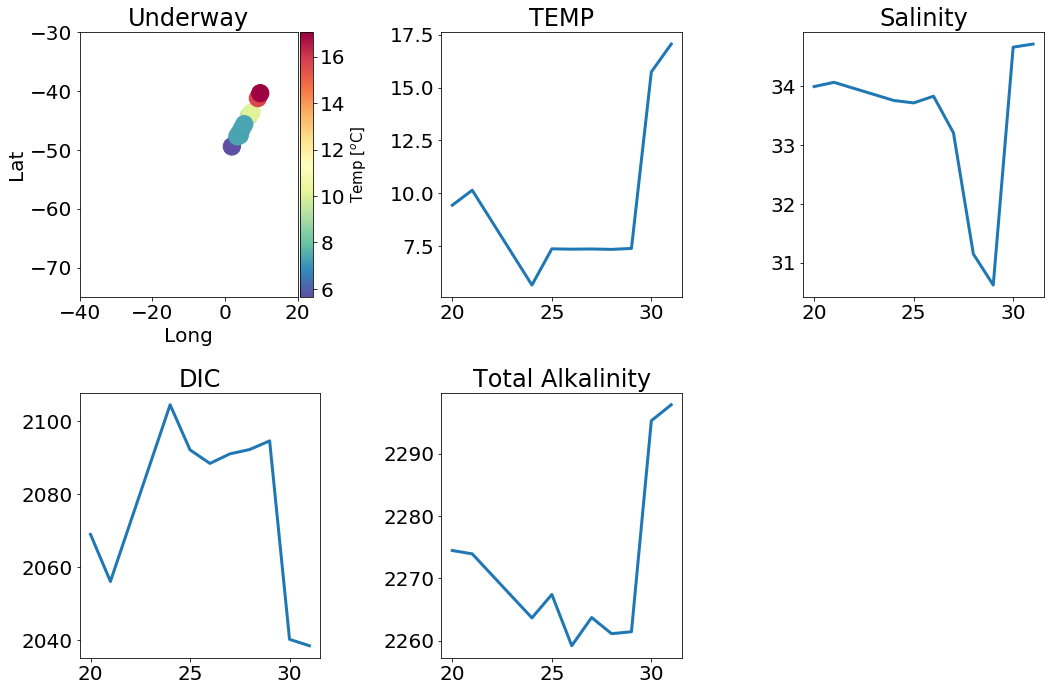

In [10]:
### subsampling the datasets by location
i = (dat_udw['Lat.'] > -50) & (dat_udw['Lat.'] < -40)
##check 

plt.rcParams['font.size'] = 20
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 3

plt.subplot(2,3,1)
plt.scatter(dat_udw.loc[i,'Long.'],dat_udw.loc[i,'Lat.'],c = dat_udw.loc[i,'IntkeTemp'],s = ms,cmap = 'Spectral_r')
plt.title('Underway')
cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Temp [$^o$C]',fontsize = 15)
plt.xlabel('Long')
plt.ylabel('Lat')
plt.xlim(-40,20)
plt.ylim(-75,-30)

plt.subplot(2,3,2)
plt.plot(dat_udw.loc[i,'IntkeTemp'])
plt.title('TEMP')

plt.subplot(2,3,3)
plt.plot(dat_udw.loc[i,'Salinity'])
plt.title('Salinity')

plt.subplot(2,3,4)
plt.plot(dat_udw.loc[i,'DIC_corr'])
plt.title('DIC')

plt.subplot(2,3,5)
plt.plot(dat_udw.loc[i,'AT_corr'])
plt.title('Total Alkalinity')
plt.tight_layout()

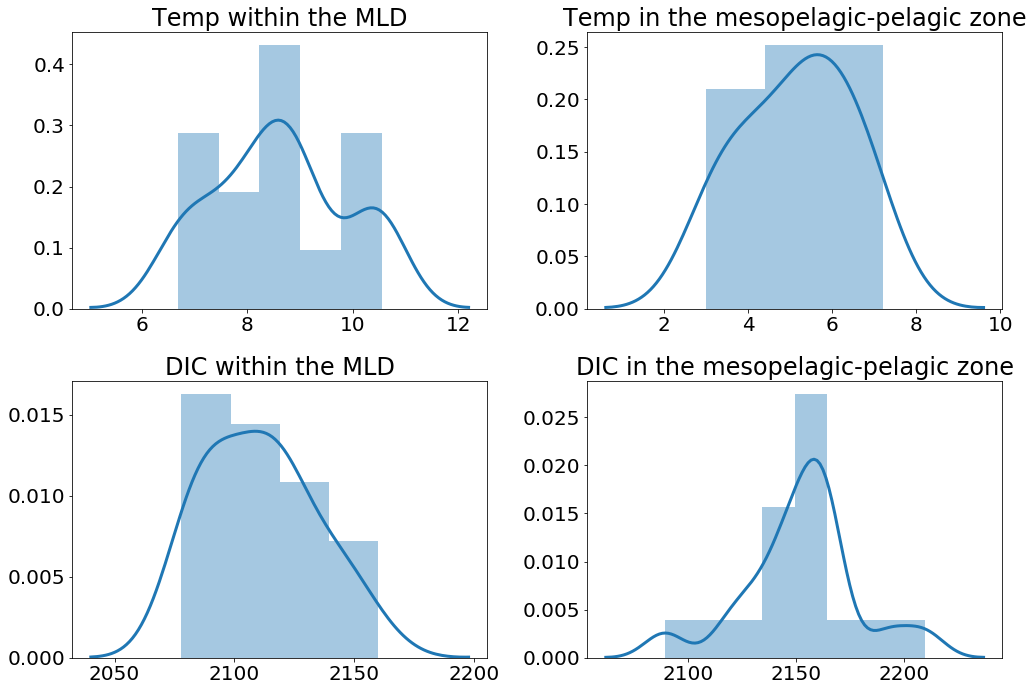

In [11]:
### subsampling the datasets depth and location 
plt.rcParams['font.size'] = 20
plt.figure(figsize=[15,10])
plt.rcParams['lines.linewidth'] = 3

i_mld = (dat_ctd['depth'] < 200) & (dat_ctd['Lat.'] > -50) & (dat_ctd['Lat.'] < -40)
i_deep = (dat_ctd['depth'] > 200) & (dat_ctd['Lat.'] > -50) & (dat_ctd['Lat.'] < -40)
##check
# sns.regplot(dat_ctd.loc[i_surf,'IntkeTemp'])
plt.subplot(2,2,1)
sns.distplot(dat_ctd.loc[i_mld,'IntakeTemp'].values)
plt.title('Temp within the MLD')
plt.subplot(2,2,2)
sns.distplot(dat_ctd.loc[i_deep,'IntakeTemp'].values)
plt.title('Temp in the mesopelagic-pelagic zone')

plt.subplot(2,2,3)
sns.distplot(dat_ctd.loc[i_mld,'DIC_corr'].values)
plt.title('DIC within the MLD')
plt.subplot(2,2,4)
sns.distplot(dat_ctd.loc[i_deep,'DIC_corr'].values)
plt.title('DIC in the mesopelagic-pelagic zone')

plt.tight_layout()

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


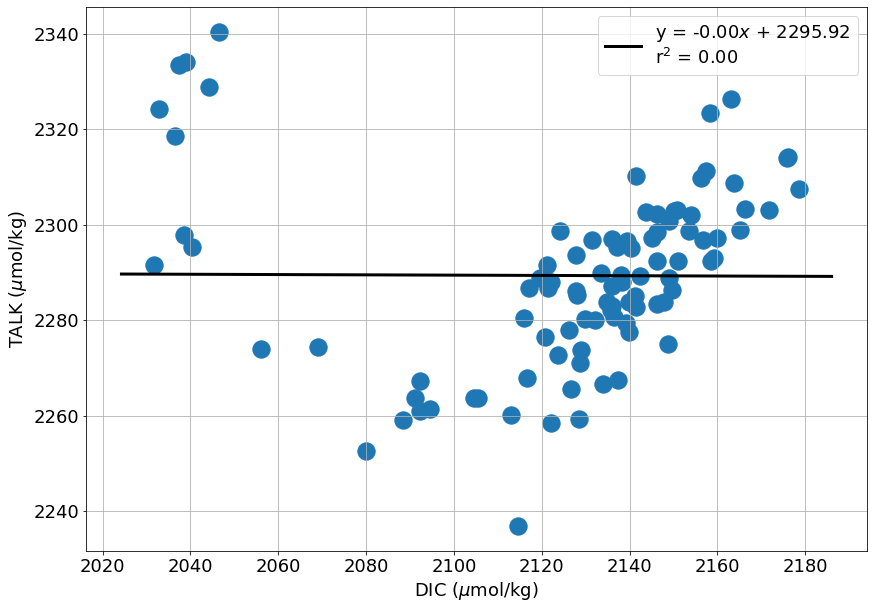

In [12]:
#### plot a regression between DIC and Total Alkanility for underway measurements

x = dat_udw['DIC_corr'].values
y = dat_udw['AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]

b, res, rank, s = plt.linalg.lstsq(x, y)

plt.figure(figsize=[14,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.scatter(dat_udw['DIC_corr'].values,dat_udw['AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
# plt.title('')

plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  import sys


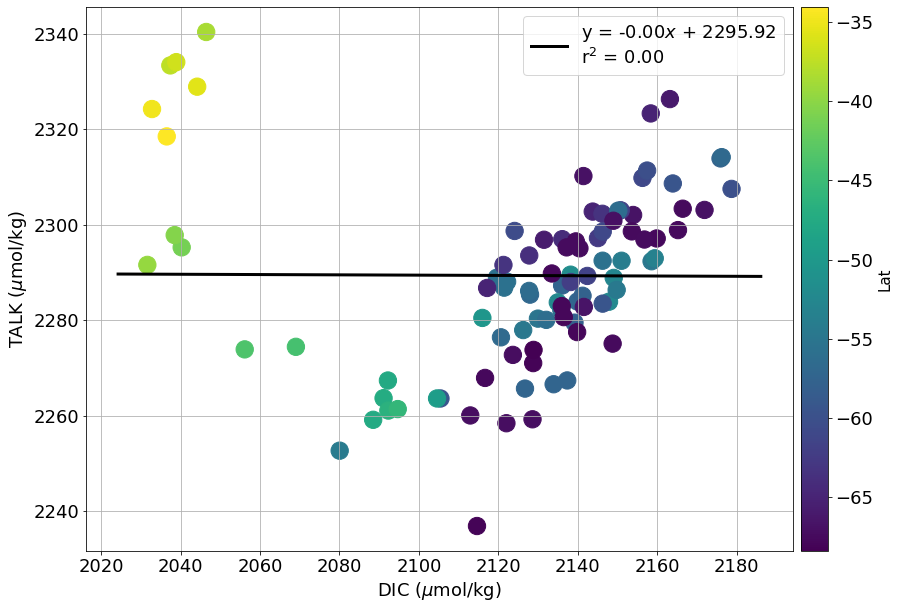

In [13]:

x = dat_udw['DIC_corr'].values
y = dat_udw['AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]

b, res, rank, s = plt.linalg.lstsq(x, y)

plt.figure(figsize=[14,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.scatter(dat_udw['DIC_corr'].values,dat_udw['AT_corr'].values,c =  dat_udw['Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
# plt.title('')

plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanw

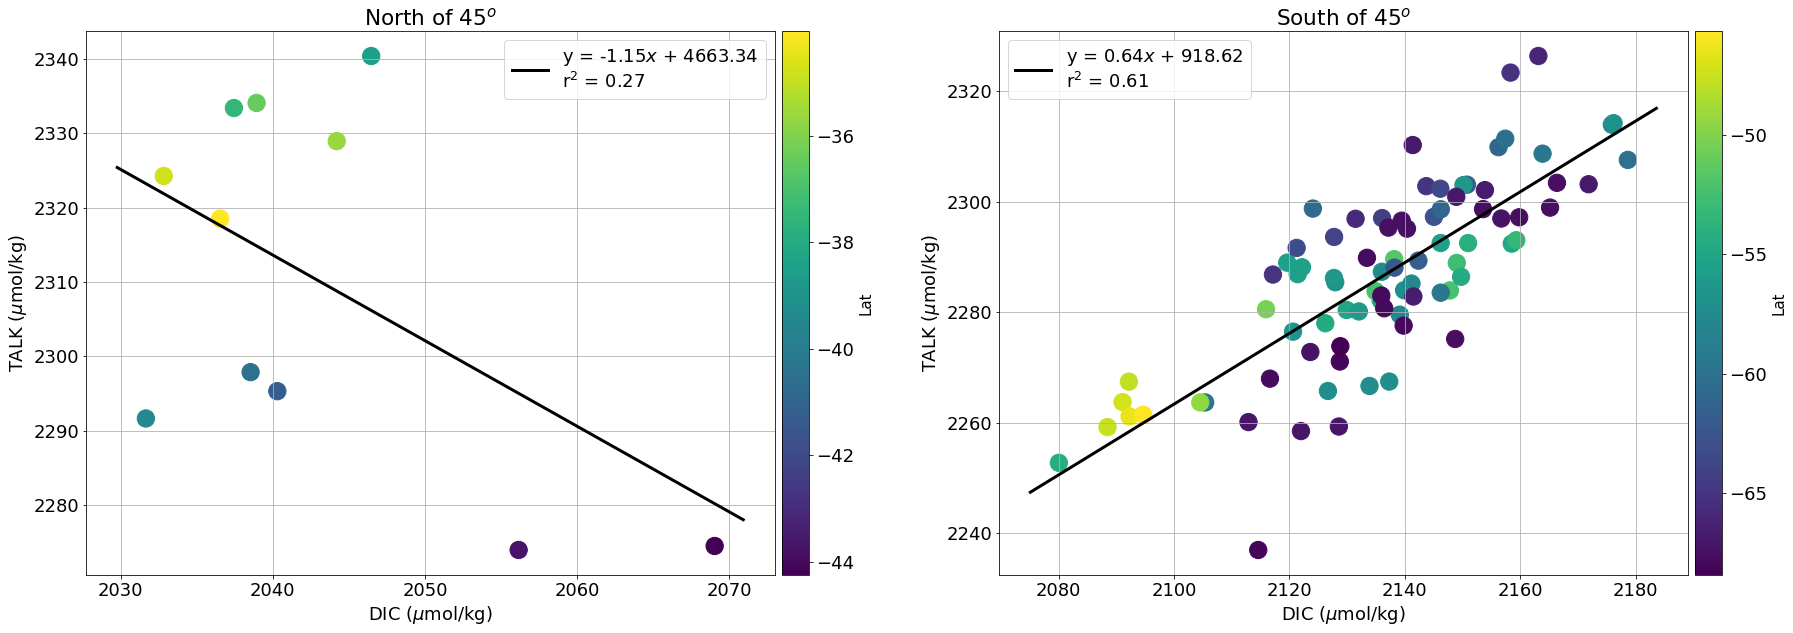

In [14]:
### find what divide the two positive correlation in high DIC waters and a negative correlation in low DIC waters?

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_45S = (dat_udw['Lat.'] > -45) 
i_S_45S = (dat_udw['Lat.'] < -45)

plt.subplot(121)

x = dat_udw.loc[i_N_45S,'DIC_corr'].values
y = dat_udw.loc[i_N_45S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_N_45S,'DIC_corr'].values,dat_udw.loc[i_N_45S,'AT_corr'].values,c =  dat_udw.loc[i_N_45S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 45$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_udw.loc[i_S_45S,'DIC_corr'].values
y = dat_udw.loc[i_S_45S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_S_45S,'DIC_corr'].values,dat_udw.loc[i_S_45S,'AT_corr'].values,c =  dat_udw.loc[i_S_45S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 45$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

Tutorial exercises

In [ ]:
### Use the CTD data for all exercies except for number 4 and 5
## 1) plot a regression of DIC and AT forregion norh of 50S and south of 50S
## 2) plot a regression of DIC and AT for region norh of 50S and south of 50S in the pelagic zone (0 - 200m)
## 3) plot a regression of DIC and AT for the region norh 50S - 60S in the mesopelagic zone (>200m)
## 4) Use seaborn to plot the regression of DIC and AT using for the underway dataframe (north of 45S and South of 45S), include the robustness of the regression in the legend (pvalue)
## 5) Add the density column to the underway dataframe, and plot regression of DIC and TA for light water masses (rho < 22) and the rest of water masses (rho > 22)
## 6) Use CTD dataset to plot regression of DIC and TA for three density bands; rho < 26.5, 26.5 < rho < 27.5, rho > 27.5
## 7) Water masses are within these density bands in the Southern Ocean; rho < 26.5, 26.5 < rho < 27.5, rho > 27.5

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanw

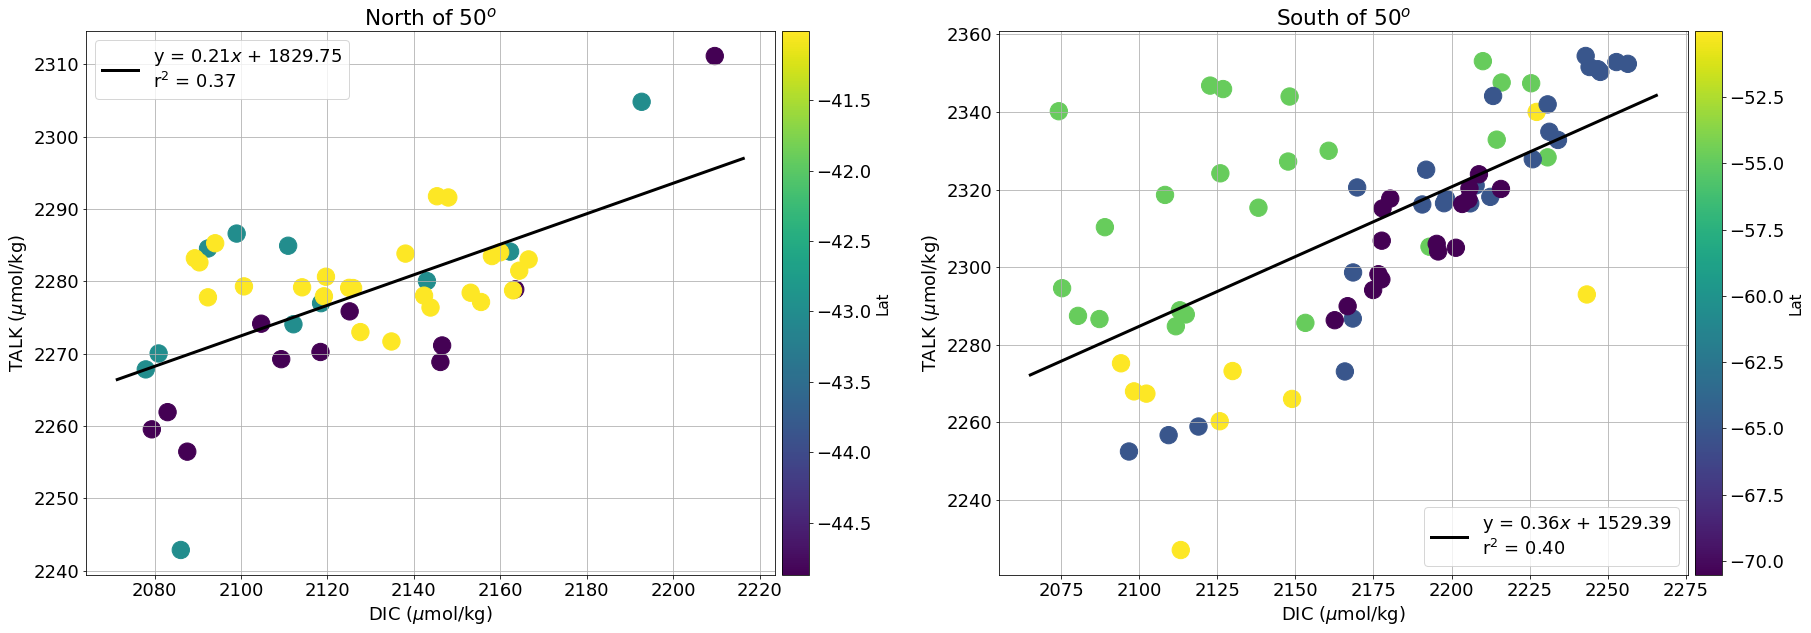

In [15]:
## 1) plot a regression of DIC and AT forregion norh of 50S and south of 50S

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S = (dat_ctd['Lat.'] > -45) 
i_S_50S = (dat_ctd['Lat.'] < -45)

plt.subplot(121)

x = dat_ctd.loc[i_N_50S,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S,'DIC_corr'].values,dat_ctd.loc[i_N_50S,'AT_corr'].values,c =  dat_ctd.loc[i_N_50S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 50$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_ctd.loc[i_S_50S,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S,'DIC_corr'].values,dat_ctd.loc[i_S_50S,'AT_corr'].values,c =  dat_ctd.loc[i_S_50S,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 50$^o$')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:41: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanw

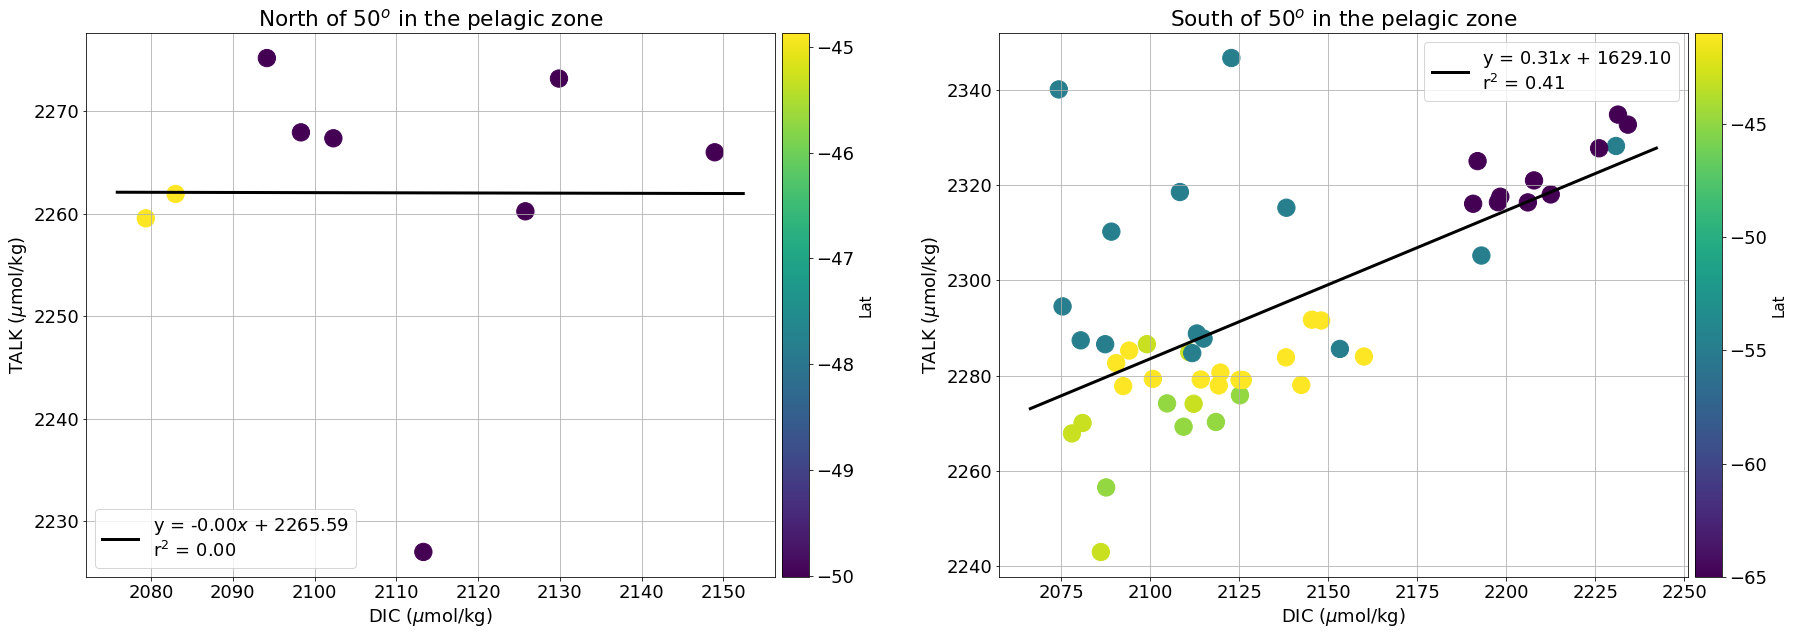

In [16]:
## 2) plot a regression of DIC and AT for region norh of 50S and south of 50S in the pelagic zone (0 - 200m)

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S_P = (dat_ctd['depth'] < 200) & (dat_udw['Lat.'] > -50) 
i_S_50S_P = (dat_ctd['depth'] < 200) & (dat_udw['Lat.'] < -50)


plt.subplot(121)

x = dat_ctd.loc[i_N_50S_P,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S_P,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S_P,'DIC_corr'].values,dat_ctd.loc[i_N_50S_P,'AT_corr'].values,c =  dat_ctd.loc[i_N_50S_P,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 50$^o$ in the pelagic zone')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_ctd.loc[i_S_50S_P,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S_P,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S_P,'DIC_corr'].values,dat_ctd.loc[i_S_50S_P,'AT_corr'].values,c =  dat_ctd.loc[i_S_50S_P,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('South of 50$^o$ in the pelagic zone')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


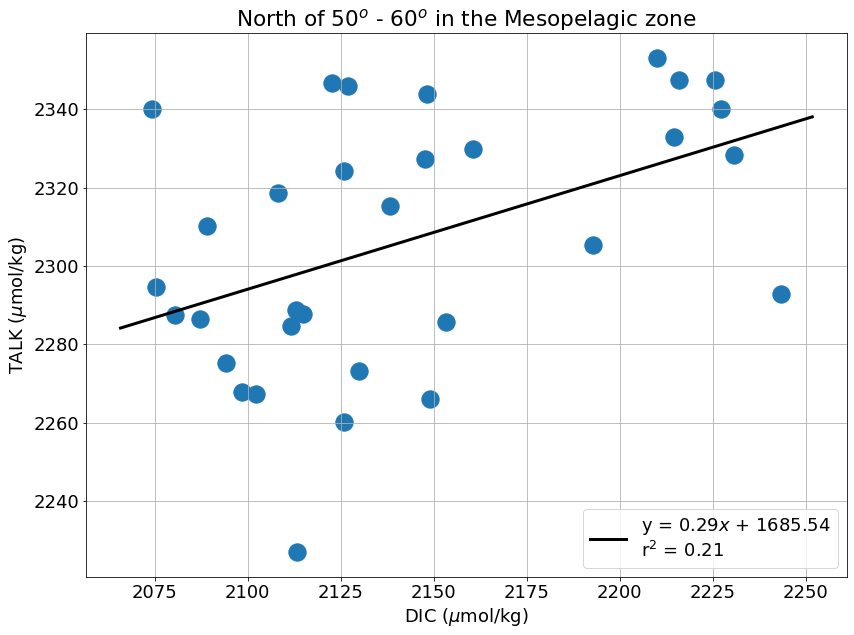

In [17]:
## 3) plot a regression of DIC and AT for the region norh 50S - 60S in the mesopelagic zone (>200m)

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

#i_N_50S_MZ = (dat_ctd['Lat.'] > -60) & (dat_ctd['Lat.'] < -50)
#i_N_50S_MZ = (dat_ctd['Lat.'] >= -60) & (dat_ctd['Lat.'] <= -50)
i_N_50S_MZ = dat_ctd['Lat.'].between(-60, -50, inclusive=False)

plt.subplot(121)

x = dat_ctd.loc[i_N_50S_MZ,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S_MZ,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S_MZ,'DIC_corr'].values,dat_ctd.loc[i_N_50S_MZ,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

#cb = plt.colorbar(pad=0.01,fraction=0.085) 
#cb.set_label('Lat',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('North of 50$^o$ - 60$^o$ in the Mesopelagic zone')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

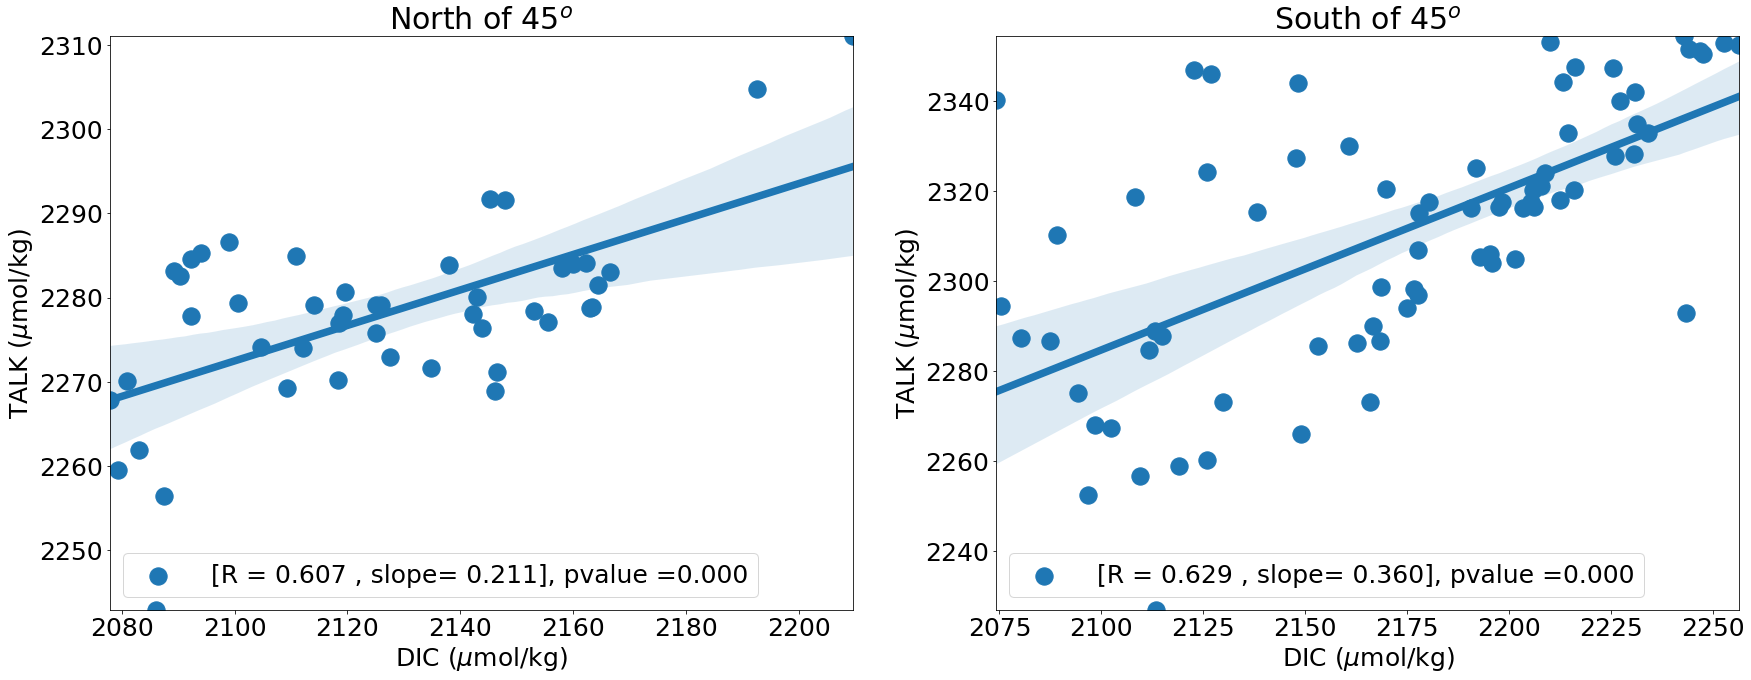

In [27]:
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

i_N_45S_m =  (dat_ctd['Lat.'] > -45)       # North of 45
i_S_45S_m =  (dat_ctd['Lat.'] < -45)       # south of 45


plt.subplot(121)
X = dat_ctd.loc[i_N_45S_m,'DIC_corr'].values
Y = dat_ctd.loc[i_N_45S_m,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.title('North of 45$^o$')
plt.legend(loc= 3)

plt.subplot(122)
X = dat_ctd.loc[i_S_45S_m,'DIC_corr'].values
Y = dat_ctd.loc[i_S_45S_m,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.title('South of 45$^o$')
plt.legend(loc= 3)


plt.tight_layout()

ValueError: array must not contain infs or NaNs

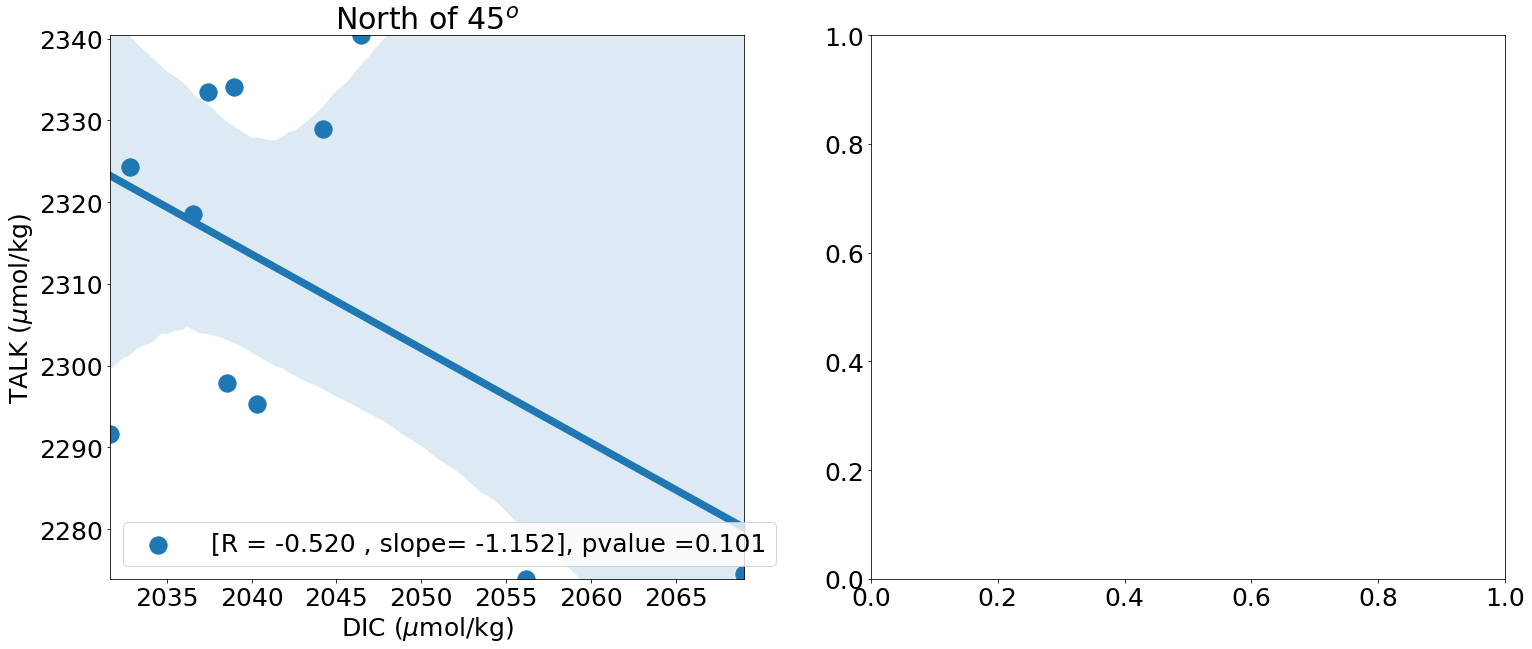

In [35]:
## with the udw dataset

plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

i_N_45S_mm =  (dat_udw['Lat.'] > -45)
i_S_45S_mm =  (dat_udw['Lat.'] < -45)       #south of 45


plt.subplot(121)
X = dat_udw.loc[i_N_45S_mm,'DIC_corr'].values
Y = dat_udw.loc[i_N_45S_mm,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.title('North of 45$^o$')
plt.legend(loc= 3)

plt.subplot(122)
X = dat_udw.loc[i_S_45S_mm,'DIC_corr'].values
Y = dat_udw.loc[i_S_45S_mm,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.title('South of 45$^o$')
plt.legend(loc= 3)


plt.tight_layout()

In [39]:
### Adding a column into a dataframe, here we are adding the density calculated above
dat_udw['Density'] = density_udw
dat_udw

,Sample Date,bottle,Lat.,Long.,niskin,depth,DIC_corr,AT_corr,IntkeTemp,Salinity,Comment,Unnamed: 11,Density
0,20140202,SAN1402015321,-67.55,-4.71,0,5,2165.191635,2298.919228,0.2861,33.9426,NaN,CTN underway,27.110805
1,20140202,SAN1402015322,-66.72,-4.11,0,5,2153.900628,2302.085982,0.3004,33.9523,NaN,CTN underway,27.117801
2,20140202,SAN1402025323,-65.86,-3.90,0,5,2131.479915,2296.898672,0.7292,33.8229,NaN,CTN underway,26.989566
3,20140202,SAN1402025324,-65.00,-3.43,0,5,2143.738722,2302.798618,0.6739,33.8591,NaN,CTN underway,27.021840
4,20140202,SAN1402025325,-64.18,-2.85,0,5,2136.079800,2297.020246,0.7367,33.8221,NaN,CTN underway,26.988475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,20140120,SAN1401205345C,-67.80,17.50,0,5,2139.812064,2277.563565,-0.0103,33.7147,NaN,IceShelf,26.943444
92,20140120,SAN1401205343,-67.35,10.01,0,5,2156.741542,2296.946170,-0.0118,33.7873,NaN,IceShelf,27.001789
93,20140120,SAN1401205342,-67.72,6.85,0,5,2116.643835,2267.963365,-0.6057,33.7965,NaN,IceShelf,27.036476
94,20140120,SAN1401205341,-68.42,0.82,0,5,2128.841843,2273.830639,-0.4984,33.6419,NaN,IceShelf,26.907576


C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\sfiso desire\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rc

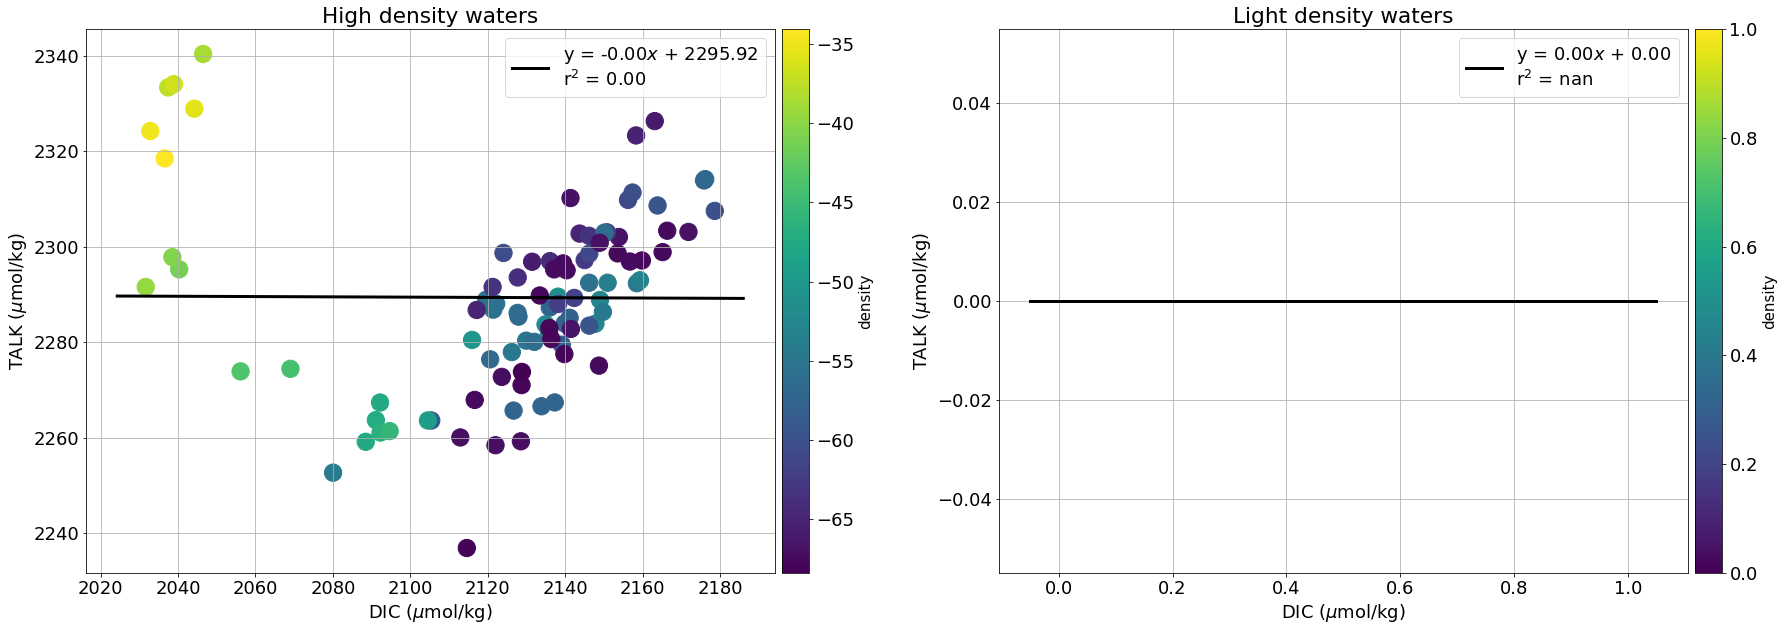

In [43]:
## plot regression of DIC and TA for light water masses (rho < 22) and the rest of water masses (rho > 22)

plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_hd = (dat_udw['Density'] > 22) 
i_ld = (dat_udw['Density'] < 22)

plt.subplot(121)

x = dat_udw.loc[i_hd,'DIC_corr'].values
y = dat_udw.loc[i_hd,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_hd,'DIC_corr'].values,dat_udw.loc[i_hd,'AT_corr'].values,c =  dat_udw.loc[i_hd,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('density',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('High density waters')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_udw.loc[i_ld,'DIC_corr'].values
y = dat_udw.loc[i_ld,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_udw.loc[i_ld,'DIC_corr'].values,dat_udw.loc[i_ld,'AT_corr'].values,c =  dat_udw.loc[i_ld,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('density',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('Light density waters')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [ ]:
## 6) Use CTD dataset to plot regression of DIC and TA for three density bands; rho < 26.5, 26.5 < rho < 27.5, rho > 27.5

In [49]:
### Adding a column into a dataframe, here we are adding the density calculated above
dat_ctd['Density'] = density_ctd

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
C:\Users\sfiso desire\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\sfiso desire\anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rc

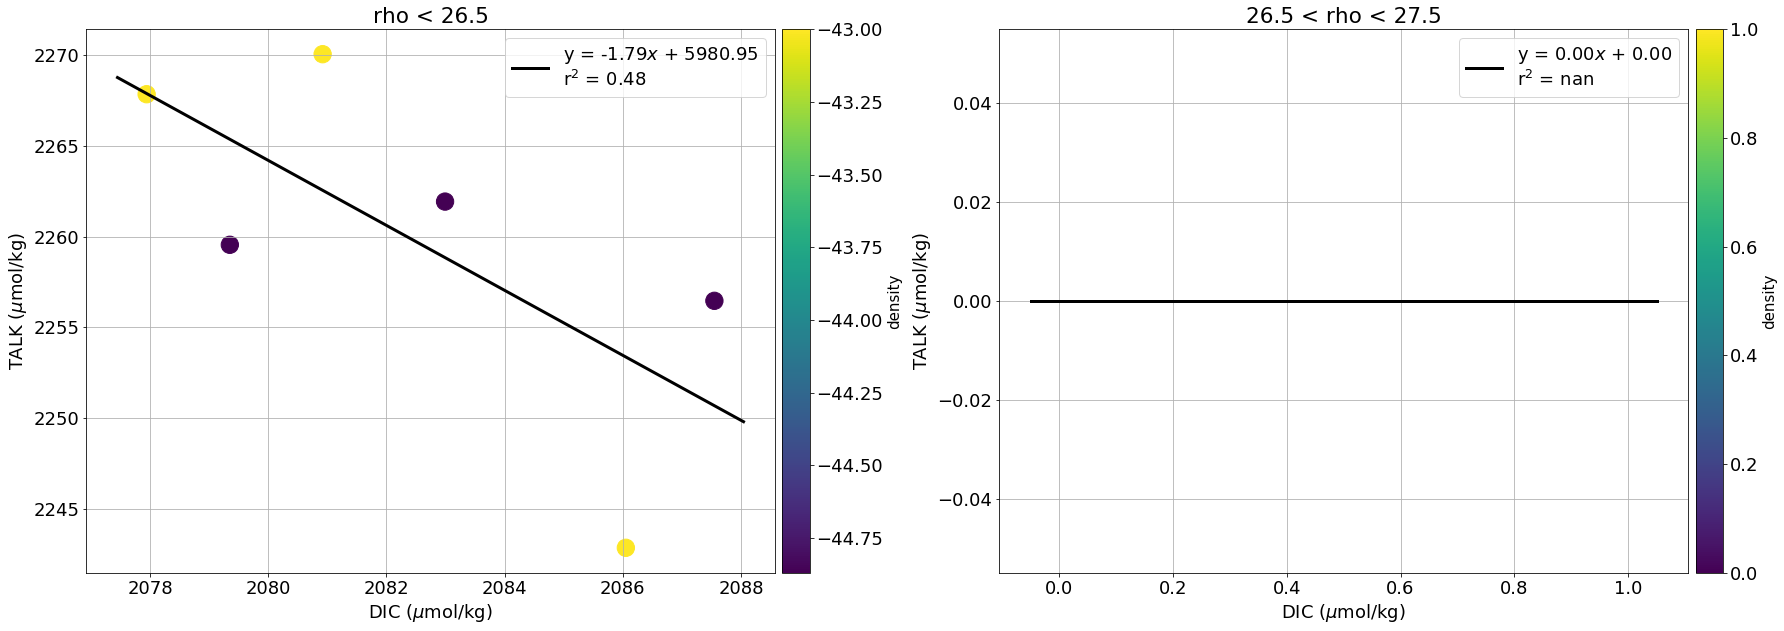

In [59]:
plt.figure(figsize=[30,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3


i_d1 = (dat_ctd['Density'] < 26.5) 
i_d2 = dat_ctd['Lat.'].between(26.5, 27.5, inclusive=False)
i_d3 = (dat_ctd['Density'] > 22)

plt.subplot(121)

x = dat_ctd.loc[i_d1,'DIC_corr'].values
y = dat_ctd.loc[i_d1,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_d1,'DIC_corr'].values,dat_ctd.loc[i_d1,'AT_corr'].values,c =  dat_ctd.loc[i_d1,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('density',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('rho < 26.5')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(122)
 

x = dat_ctd.loc[i_d2,'DIC_corr'].values
y = dat_ctd.loc[i_d2,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_d2,'DIC_corr'].values,dat_ctd.loc[i_d2,'AT_corr'].values,c =  dat_ctd.loc[i_d2,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('density',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('26.5 < rho < 27.5')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

C:\Users\sfiso desire\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


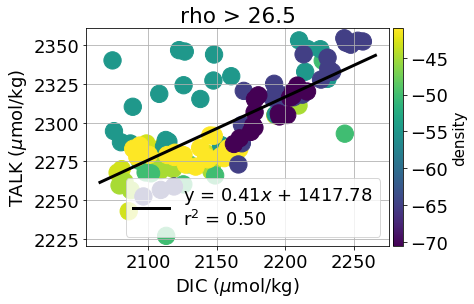

In [64]:

x = dat_ctd.loc[i_d3,'DIC_corr'].values
y = dat_ctd.loc[i_d3,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_d3,'DIC_corr'].values,dat_ctd.loc[i_d3,'AT_corr'].values,c =  dat_ctd.loc[i_d3,'Lat.'],s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

cb = plt.colorbar(pad=0.01,fraction=0.085) 
cb.set_label('density',fontsize = 15)
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('rho > 26.5')
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)


In [ ]:
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S =  (dat_ctd['Lat.'] > -50)
i_S_50S =  (dat_ctd['Lat.'] < -50) 

plt.subplot(131)
x = dat_ctd.loc[i_N_50S,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S,'DIC_corr'].values,dat_ctd.loc[i_N_50S,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(132)
x = dat_ctd.loc[i_S_50S,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S,'DIC_corr'].values,dat_ctd.loc[i_S_50S,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [ ]:
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_N_50S_mld =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] < 200)
i_N_50S_deep =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] > 200) 

plt.subplot(131)
x = dat_ctd.loc[i_N_50S_mld,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S_mld,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S_mld,'DIC_corr'].values,dat_ctd.loc[i_N_50S_mld,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(132)
x = dat_ctd.loc[i_N_50S_deep,'DIC_corr'].values
y = dat_ctd.loc[i_N_50S_deep,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_N_50S_deep,'DIC_corr'].values,dat_ctd.loc[i_N_50S_deep,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [ ]:
plt.figure(figsize=[35,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3

i_S_50S_mld =  (dat_ctd['Lat.'] < -50) & (dat_ctd['depth'] < 200)
i_S_50S_deep =  (dat_ctd['Lat.'] < -50) & (dat_ctd['depth'] > 200)

plt.subplot(131)
x = dat_ctd.loc[i_S_50S_mld,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S_mld,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S_mld,'DIC_corr'].values,dat_ctd.loc[i_S_50S_mld,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.subplot(132)
x = dat_ctd.loc[i_S_50S_deep,'DIC_corr'].values
y = dat_ctd.loc[i_S_50S_deep,'AT_corr'].values
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]
b, res, rank, s = plt.linalg.lstsq(x, y)

plt.scatter(dat_ctd.loc[i_S_50S_deep,'DIC_corr'].values,dat_ctd.loc[i_S_50S_deep,'AT_corr'].values,s = 300)
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

# plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [ ]:
### Adding a column into a dataframe, here we are adding the density calculated above
dat_ctd['Density'] = density_ctd
dat_ctd

In [ ]:
### Making a scatter using, adding a regressiong line, using seaborn (to install; pip install seaborn or conda install seaborn)
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

i_N_50S_mld =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] < 200)
i_N_50S_deep =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] > 200) 

i_S_50S_mld =  (dat_ctd['Lat.'] < -50) & (dat_ctd['depth'] < 200)
i_S_50S_deep =  (dat_ctd['Lat.'] < -50) & (dat_ctd['depth'] > 200)


plt.subplot(121)
X = dat_ctd.loc[i_S_50S_mld,'DIC_corr'].values
Y = dat_ctd.loc[i_S_50S_mld,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.legend(loc= 3)

plt.subplot(122)
X = dat_ctd.loc[i_S_50S_deep,'DIC_corr'].values
Y = dat_ctd.loc[i_S_50S_deep,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.legend(loc= 3)


plt.tight_layout()

In [ ]:
### Making a scatter using, adding a regressiong line, using seaborn (to install; pip install seaborn or conda install seaborn)
plt.rcParams['font.size'] = 25
plt.figure(figsize=[25,10])
plt.rcParams['lines.linewidth'] = 5

i_N_50S_mld =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] < 200)
i_N_50S_deep =  (dat_ctd['Lat.'] > -50) & (dat_ctd['depth'] > 200)


plt.subplot(121)
X = dat_ctd.loc[i_N_50S_mld,'DIC_corr'].values
Y = dat_ctd.loc[i_N_50S_mld,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())

plt.plot(np.arange(X.min(),X.max(),abs(X.min()-X.max())/100.0),\
         np.zeros(100),'--',linewidth = 2,color = 'k')
plt.plot(np.zeros(100),np.arange(Y.min(),Y.max(),abs(Y.min()-Y.max())/100.0),\
       '--',linewidth = 2,color = 'k')
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.legend(loc= 3)

plt.subplot(122)
X = dat_ctd.loc[i_N_50S_deep,'DIC_corr'].values
Y = dat_ctd.loc[i_N_50S_deep,'AT_corr'].values
(r, p) = stats.pearsonr(X, Y)
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X,Y)

plt.scatter(X,Y,s = 300,label = f' [R = {r:0.3f} , slope= {slope:0.3f}], pvalue ={p_value:0.3f}')
sns.regplot(X, Y)
plt.xlim(X.min(),X.max())
plt.ylim(Y.min(),Y.max())
plt.xlabel('DIC ($\mu$mol/kg)')
plt.ylabel('TALK ($\mu$mol/kg)')
plt.legend(loc= 3)


plt.tight_layout()

In [ ]:
x = Alk_calc2
y = alk3
i = ~(isnan(x) + isnan(y))
x = np.c_[ones(i.sum()), x[i]]
y = y[i]

b, res, rank, s = plt.linalg.lstsq(x, y)

In [ ]:
lines = []
plt.figure(figsize=[14,10])
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 3
plt.scatter(Alk_calc2,alk3,s = 90)
plt.xlabel('derived TALK ($\mu$mol/kg)')
plt.ylabel('observed TALK ($\mu$mol/kg)')

# plt.ylim(2200,2520)

xx = np.linspace(*plt.xlim())
yy = xx * b[1] + b[0]
lines = plt.plot(xx, yy, 'k-')[0],
plt.grid(1)
plt.title('Correlation Between Observed and Calculated TALK')

plt.ylim(2220,2380)
plt.xlim(2220,2380)

plt.legend(lines, ['y = %.2f$x$ + %.2f\nr$^2$ = %.2f' % (b[1], b[0], corrcoef(x[:, 1], y)[1, 0]**2)], loc=0)

plt.savefig('Fig_A1_c.png',bbox_inches = 'tight')

In [ ]:
import csv
b = open('test.csv', 'w')
a = csv.writer(b)
data = ['alk3]'],\['Alk_calc2']
a.writerows(data)
b.close()

In [ ]:
import csv
b = open('test.csv', 'w')
a = csv.writer(b)
data = [['Me', 'You'],\
        ['293', '219'],\
        ['54', '13']]
a.writerows(data)
b.close()